# Titanic Suvivor Analysis

## By: Tahsin Jahin Khalid

### Part II: Exploratory Data Analysis (EDA)

#### Import Essential Modules

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import pickle

In [19]:
%matplotlib inline

# adjust seaborn
sns.set_style('darkgrid')
sns.set_palette('deep')
sns.set_context('notebook')

# ignore deprecation/other warnings
warnings.filterwarnings('ignore')

#### Load Data

In [20]:
titanic_df = pd.read_pickle(os.path.join("interim_data","preprocessed.pkl"))

In [21]:
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [22]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Dropping `PassengerId`, `Ticket` and `Name` columns.

In [23]:
titanic_df.drop("PassengerId", axis=1, inplace=True)
titanic_df.drop("Ticket", axis=1, inplace=True)
titanic_df.drop("Name", axis=1, inplace=True)

In [24]:
titanic_df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


#### Data Visualisations

We are inspecting the features: PClass, Age, Sex, Fare, SibSp, Parch and Fare

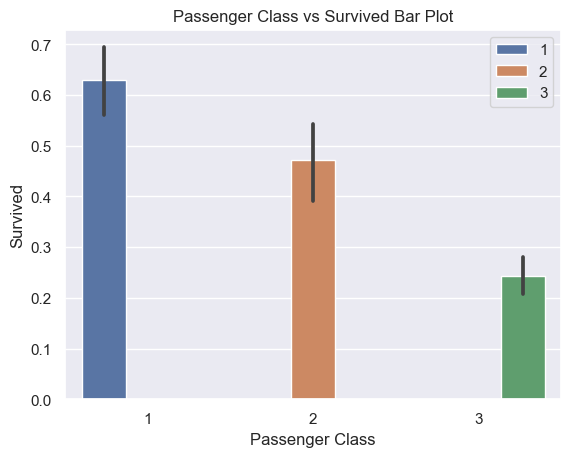

In [30]:
sns.barplot(x="Pclass",
            y="Survived",
            data=titanic_df,
            hue="Pclass")
plt.title("Passenger Class vs Survived Bar Plot")
plt.xlabel("Passenger Class")
plt.ylabel("Survived")
plt.legend()
plt.show()

First Class Passengers seem to have the highest survival rate here. This was also shown in the movie as these passengers where evacuated to the lifeboats before any other class.

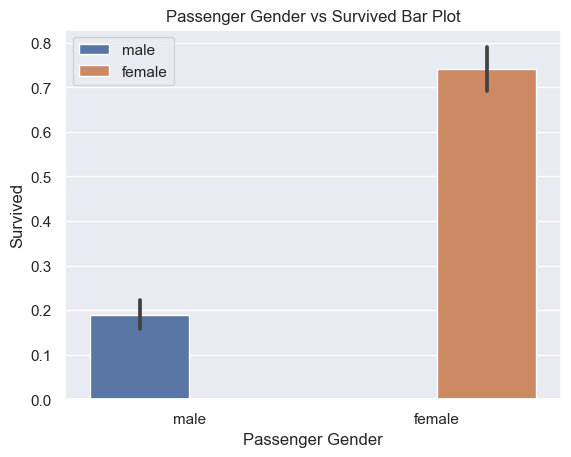

In [31]:
sns.barplot(x="Sex",
            y="Survived",
            data=titanic_df,
            hue="Sex")
plt.title("Passenger Gender vs Survived Bar Plot")
plt.xlabel("Passenger Gender")
plt.ylabel("Survived")
plt.legend()
plt.show()


Female Passengers have the higher survivor rate.

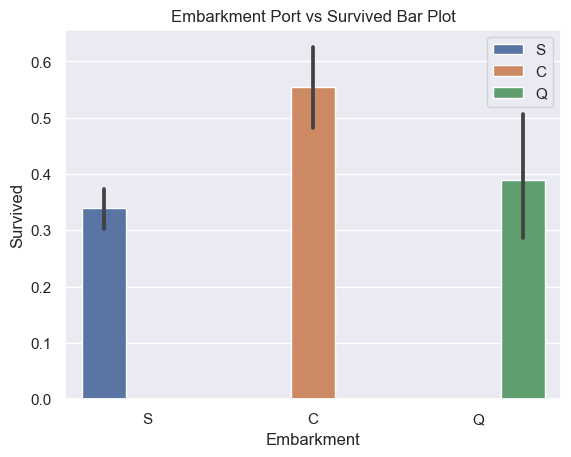

In [41]:
sns.barplot(x="Embarked",
            y="Survived",
            data=titanic_df,
            hue="Embarked")
plt.title("Embarkment Port vs Survived Bar Plot")
plt.xlabel("Embarkment")
plt.ylabel("Survived")
plt.legend()
plt.show()


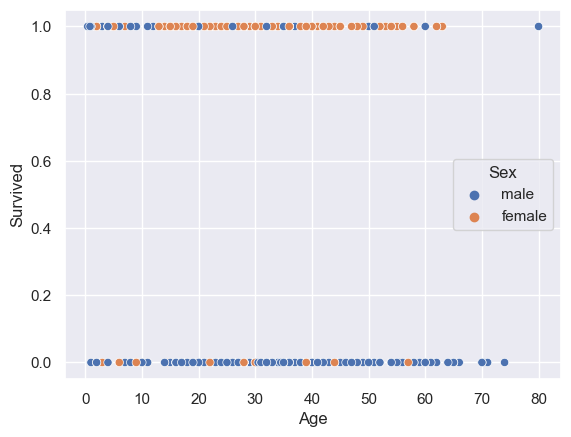

In [43]:
sns.scatterplot(x="Age",
                y="Survived",
                data=titanic_df,
                hue="Sex")
plt.show()

In [44]:
# split age to groups
bins = [0, 18, 25, 35,
        45, 60, 100]
labels = ["<18", "18-24", "25-34",
          "35-44", "45-59", "60+"]
titanic_df["AgeGroup"] = pd.cut(titanic_df["Age"], bins=bins,
                                labels=labels, right=False)

In [45]:
titanic_df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup
0,0,3,male,22.0,1,0,7.2500,S,18-24
1,1,1,female,38.0,1,0,71.2833,C,35-44
2,1,3,female,26.0,0,0,7.9250,S,25-34
3,1,1,female,35.0,1,0,53.1000,S,35-44
4,0,3,male,35.0,0,0,8.0500,S,35-44


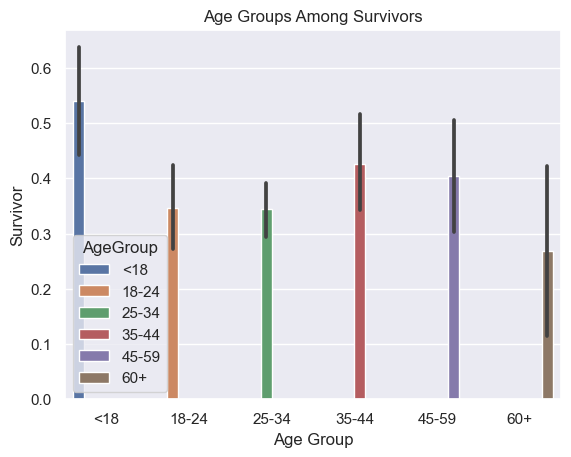

In [47]:
sns.barplot(x="AgeGroup",
            y="Survived",
            data=titanic_df,
            hue="AgeGroup")
plt.title("Age Groups Among Survivors")
plt.ylabel("Survivor")
plt.xlabel("Age Group")
plt.show()

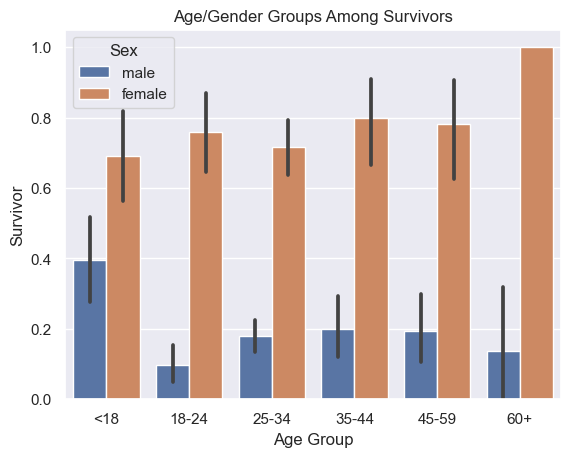

In [50]:
sns.barplot(x="AgeGroup",
            y="Survived",
            data=titanic_df,
            hue="Sex")
plt.title("Age/Gender Groups Among Survivors")
plt.ylabel("Survivor")
plt.xlabel("Age Group")
plt.show()

Among all age groups, the female passengers have survived the most.

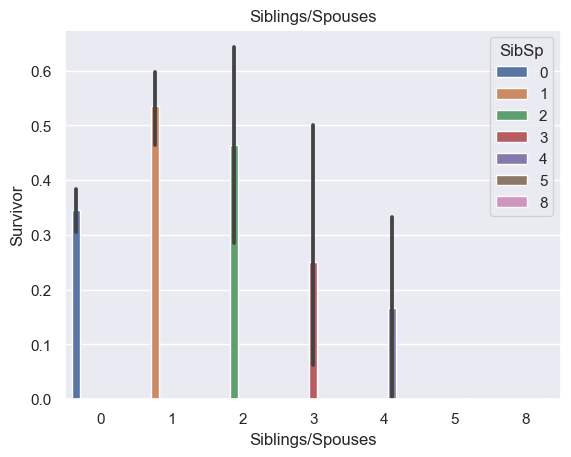

In [53]:
sns.barplot(x="SibSp",
            y="Survived",
            data=titanic_df,
            hue="SibSp")
plt.title("Siblings/Spouses")
plt.ylabel("Survivor")
plt.xlabel("Siblings/Spouses")
plt.show()

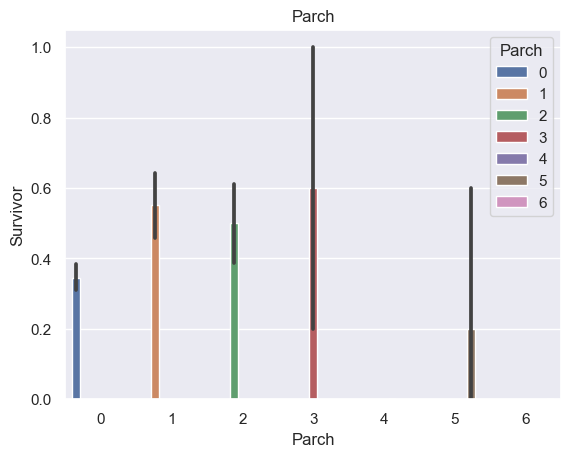

In [55]:
sns.barplot(x="Parch",
            y="Survived",
            data=titanic_df,
            hue="Parch")
plt.title("Parch")
plt.ylabel("Survivor")
plt.xlabel("Parch")
plt.show()


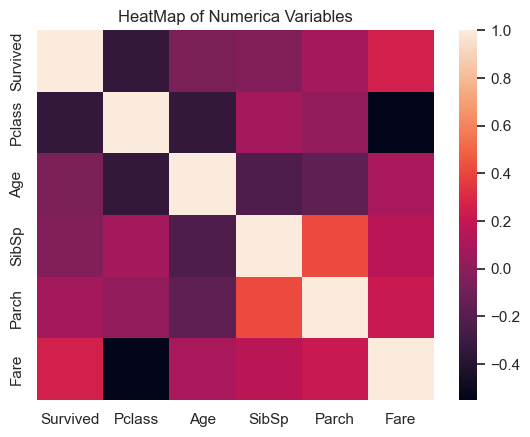

In [61]:

corr = titanic_df.drop(["Sex", "Embarked", "AgeGroup"], axis=1).corr()
sns.heatmap(corr)
plt.title("HeatMap of Numerica Variables")
plt.show()